## Flight Delay Prediction Challenge

### EDA Departure point and arrival point

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/Train.csv')
df.columns = df.columns.str.lower()

In [3]:
#delete columns
df = df[~df['status'].isin(['DEL', 'SCH', 'RTR'])]

In [4]:
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [5]:
df['status'].unique()

array(['ATA', 'DEP'], dtype=object)

In [6]:
df.describe()

,target
count,94146.000000
mean,55.599579
std,123.207352
min,0.000000
25%,0.000000
50%,19.000000
75%,50.000000
max,3451.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94146 entries, 0 to 107831
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      94146 non-null  object 
 1   datop   94146 non-null  object 
 2   fltid   94146 non-null  object 
 3   depstn  94146 non-null  object 
 4   arrstn  94146 non-null  object 
 5   std     94146 non-null  object 
 6   sta     94146 non-null  object 
 7   status  94146 non-null  object 
 8   ac      94146 non-null  object 
 9   target  94146 non-null  float64
dtypes: float64(1), object(9)
memory usage: 7.9+ MB


In [8]:
df['depstn'].nunique()

129

In [9]:
df['depstn'].unique()

array(['CMN', 'MXP', 'TUN', 'DJE', 'TLS', 'IST', 'ORY', 'MIR', 'BRU',
       'ABJ', 'VCE', 'AMS', 'FRA', 'BCN', 'JED', 'ALG', 'LIS', 'SXB',
       'LYS', 'OUA', 'LGW', 'BEY', 'NCE', 'OPO', 'MRS', 'DUS', 'SFA',
       'FCO', 'CDG', 'NKC', 'NTE', 'ZRH', 'GVA', 'OUD', 'MUC', 'SXF',
       'HAM', 'NDR', 'NBE', 'CAI', 'BEG', 'VIE', 'ORN', 'MAD', 'TOE',
       'BKO', 'DKR', 'KGL', 'BLQ', 'MLA', 'AHU', 'LHR', 'BOD', 'PRG',
       'LJU', 'SVO', 'MED', 'BUD', 'CRL', 'OST', 'TNG', 'NAP', 'BRQ',
       'OSR', 'YUL', 'NIM', 'TMR', 'JIB', 'CGN', 'EBL', 'GAE', 'CPH',
       'ARN', 'BJA', 'AYT', 'RAK', 'LFW', 'LIL', 'PMO', 'FBM', 'TBJ',
       'PSA', 'KRT', 'GNB', 'CZL', 'MVB', 'VNO', 'ESB', 'LBV', 'CKY',
       'LED', 'KSC', 'BTS', 'AMM', 'OTP', 'TRN', 'IEV', 'HBE', 'CAG',
       'KBP', 'ATH', 'SKG', 'ADB', 'DSS', 'DOH', 'COO', 'LUX', 'FIH',
       'BYJ', 'KEF', 'EBM', 'BDS', 'AAL', 'AAE', 'VKO', 'BRI', 'VRN',
       'GAF', 'SKX', 'HAJ', 'BLL', 'TLL', 'VOG', 'LAD', 'GHA', 'KTW',
       'KRR', 'RTM',

In [10]:
df['depstn'].isna().sum()

0

In [11]:
df['arrstn'].nunique()

126

In [12]:
df['arrstn'].unique()

array(['TUN', 'IST', 'NTE', 'ALG', 'BCN', 'ORY', 'FCO', 'NCE', 'MRS',
       'MED', 'FRA', 'BRU', 'DJE', 'LYS', 'CMN', 'BEG', 'OUA', 'GVA',
       'MXP', 'BEY', 'MAD', 'JED', 'ABJ', 'VIE', 'MLA', 'BLQ', 'SFA',
       'LIS', 'LHR', 'CDG', 'MIR', 'CAI', 'DUS', 'HAM', 'NBE', 'ZRH',
       'AMS', 'NDR', 'TLS', 'VCE', 'SXB', 'MUC', 'LGW', 'CRL', 'ORN',
       'DKR', 'BOD', 'SXF', 'LJU', 'OST', 'NKC', 'BKO', 'TOE', 'AHU',
       'YUL', 'PRG', 'OUD', 'BRQ', 'JIB', 'BUD', 'OPO', 'KGL', 'NIM',
       'SVO', 'LIL', 'OSR', 'EBL', 'TNG', 'PSA', 'CGN', 'AYT', 'GAE',
       'NAP', 'CPH', 'ARN', 'BJA', 'KRT', 'LFW', 'TBJ', 'TMR', 'FBM',
       'RAK', 'PMO', 'GNB', 'ESB', 'CZL', 'LBV', 'KSC', 'CKY', 'AMM',
       'LED', 'BTS', 'MVB', 'HBE', 'OTP', 'CAG', 'VNO', 'TRN', 'ATH',
       'ADB', 'SKG', 'BYJ', 'DSS', 'COO', 'IEV', 'LUX', 'KBP', 'DOH',
       'FIH', 'EBM', 'BDS', 'VKO', 'AAE', 'BLL', 'HAJ', 'BRI', 'CTA',
       'VRN', 'SKX', 'GAF', 'VOG', 'BGY', 'LAD', 'KRR', 'GHA', 'RTM'],
      dtype=object)

In [13]:
df['arrstn'].isna().sum()

0

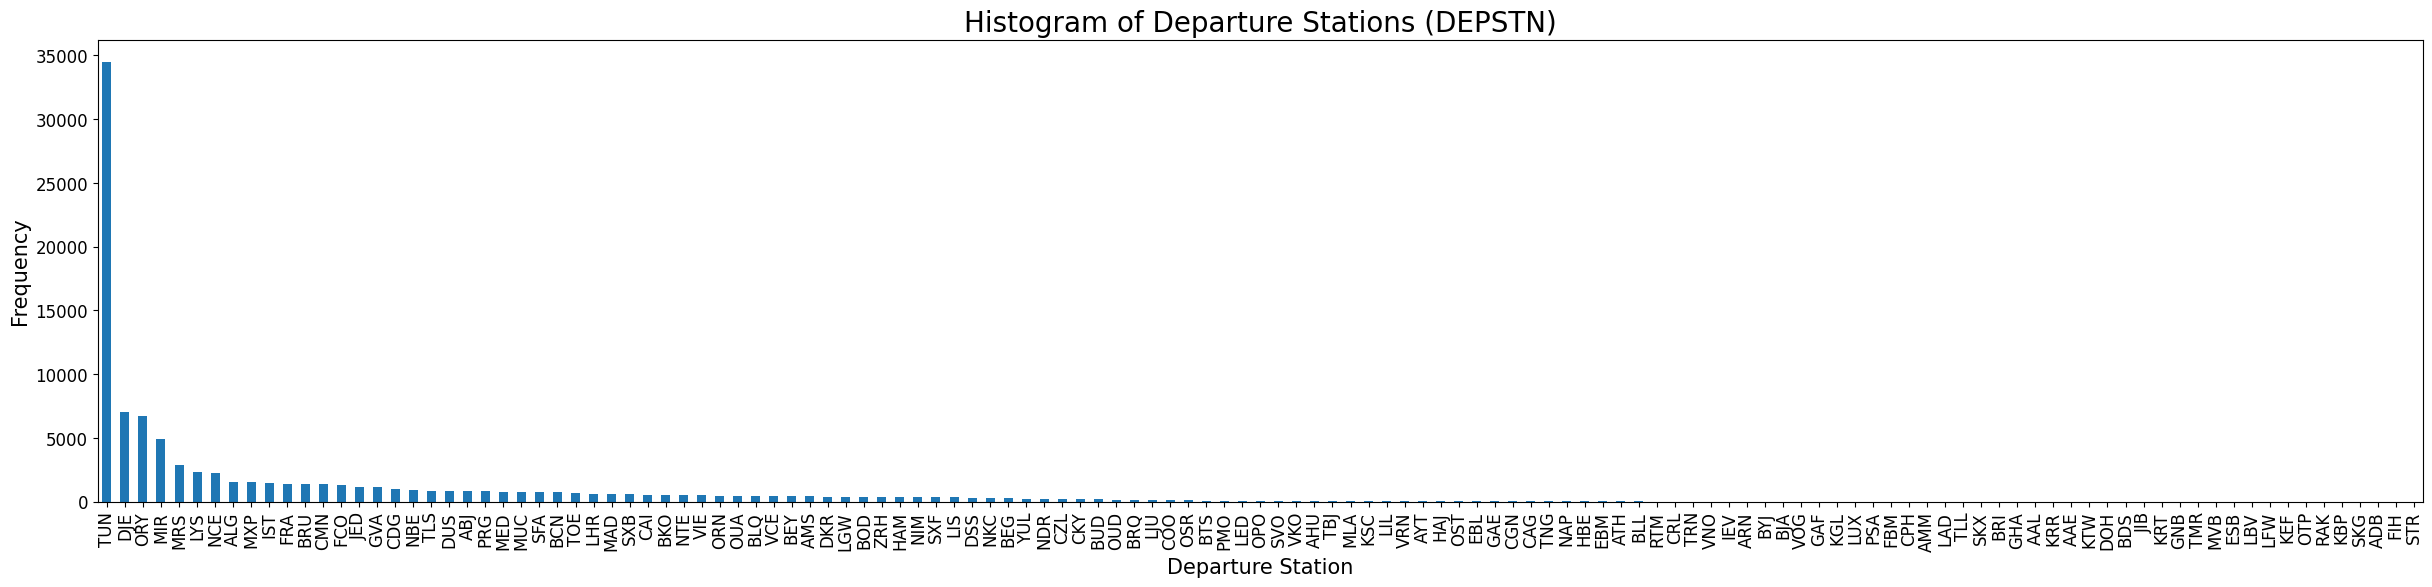

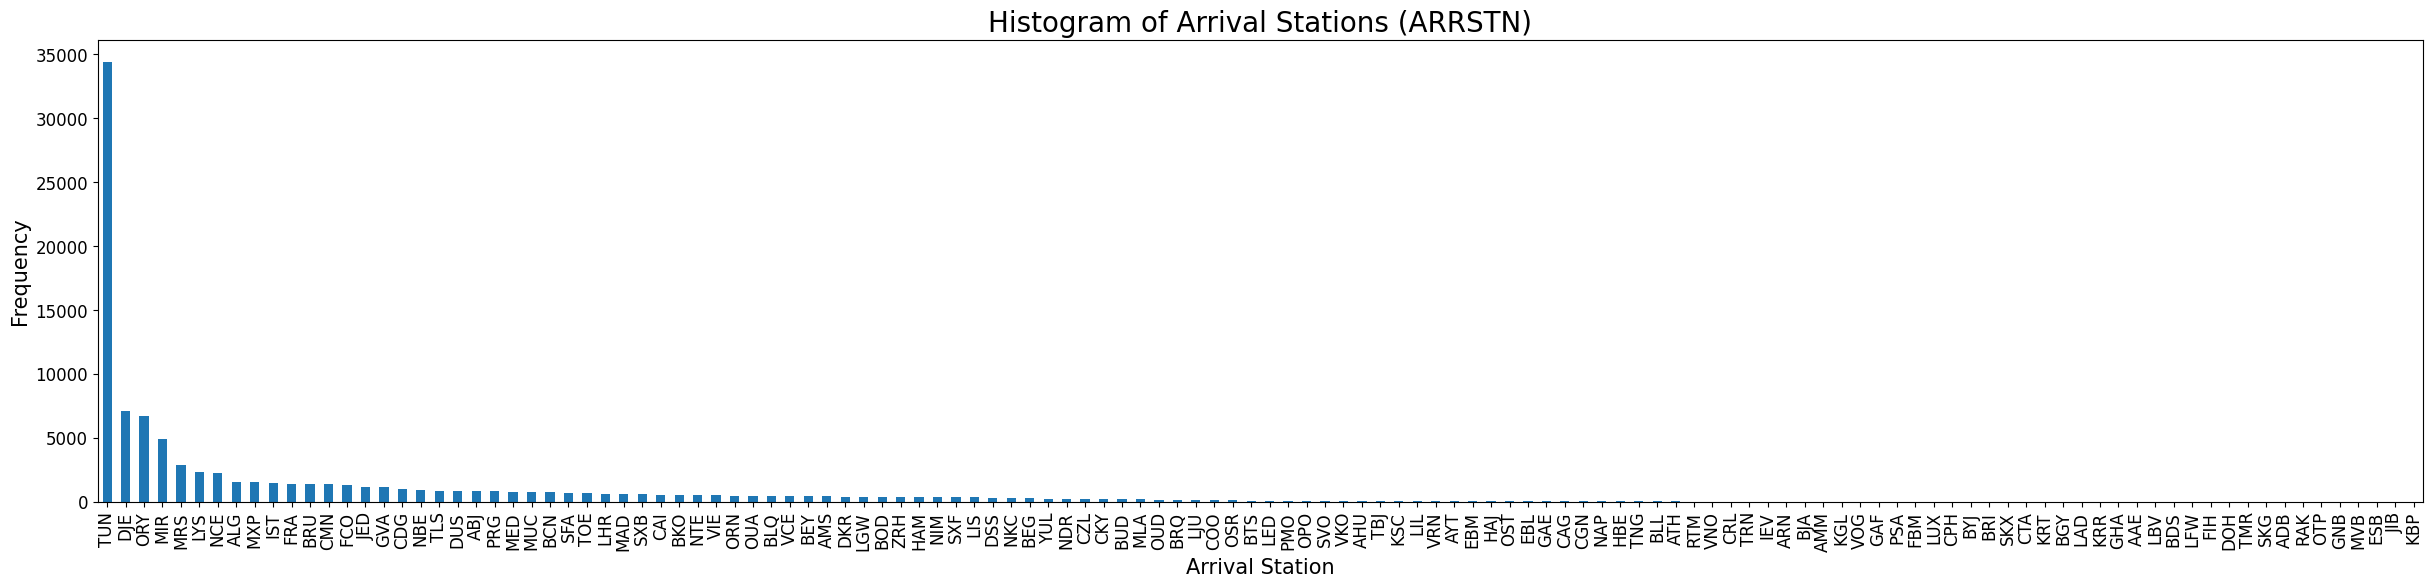

In [14]:
# Plot histogram for DEPSTN
plt.figure(figsize=(30, 6))
df['depstn'].value_counts().plot(kind='bar')
plt.title('Histogram of Departure Stations (DEPSTN)', fontsize=20)
plt.xlabel('Departure Station', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot histogram for ARRSTN
plt.figure(figsize=(30, 6))
df['arrstn'].value_counts().plot(kind='bar')
plt.title('Histogram of Arrival Stations (ARRSTN)', fontsize=20)
plt.xlabel('Arrival Station', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [15]:
# Calculate the frequency of each departure station
depstn_freq = df['depstn'].value_counts()

# List of DEPSTN ordered by most frequent (top 30)
depstn_freq_top30 = depstn_freq.head(30)
print("Top 30 Departure Stations by Frequency:")
print(depstn_freq_top30)

Top 30 Departure Stations by Frequency:
depstn
TUN    34520
DJE     7042
ORY     6726
MIR     4881
MRS     2834
LYS     2337
NCE     2221
ALG     1570
MXP     1531
IST     1437
FRA     1369
BRU     1368
CMN     1345
FCO     1265
JED     1136
GVA     1106
CDG      973
NBE      911
TLS      850
DUS      826
ABJ      813
PRG      794
MED      783
MUC      745
SFA      727
BCN      721
TOE      670
LHR      578
MAD      578
SXB      569
Name: count, dtype: int64


In [16]:
# List of DEPSTN ordered by least frequent (bottom 50)
depstn_freq_bottom50 = depstn_freq.tail(50)
print("Bottom 50 Departure Stations by Frequency:")
print(depstn_freq_bottom50)

Bottom 50 Departure Stations by Frequency:
depstn
CAG    13
TNG    11
NAP    10
HBE    10
EBM     9
ATH     9
BLL     8
RTM     7
CRL     6
TRN     6
VNO     5
IEV     4
ARN     4
BYJ     3
BJA     3
VOG     2
GAF     2
KGL     2
LUX     2
PSA     2
FBM     2
CPH     2
AMM     2
LAD     2
TLL     1
SKX     1
BRI     1
GHA     1
AAL     1
KRR     1
AAE     1
KTW     1
DOH     1
BDS     1
JIB     1
KRT     1
GNB     1
TMR     1
MVB     1
ESB     1
LBV     1
LFW     1
KEF     1
OTP     1
RAK     1
KBP     1
SKG     1
ADB     1
FIH     1
STR     1
Name: count, dtype: int64


In [17]:
# Calculate the frequency of each departure station
arrstn_freq = df['arrstn'].value_counts()

# List of ARRSTN ordered by most frequent (top 30)
arrstn_freq_top20 = arrstn_freq.head(30)
print("\nTop 20 Arrival Stations by Frequency:")
print(arrstn_freq_top20)


Top 20 Arrival Stations by Frequency:
arrstn
TUN    34407
DJE     7080
ORY     6726
MIR     4879
MRS     2834
LYS     2337
NCE     2222
ALG     1570
MXP     1531
IST     1437
FRA     1369
BRU     1366
CMN     1345
FCO     1266
JED     1140
GVA     1106
CDG      947
NBE      908
TLS      850
DUS      826
ABJ      813
PRG      794
MED      783
MUC      745
BCN      721
SFA      691
TOE      672
LHR      578
MAD      578
SXB      569
Name: count, dtype: int64


In [18]:
# List of arrstn ordered by least frequent (bottom 50)
depstn_freq_bottom50 = arrstn_freq.tail(50)
print("Bottom 50 Departure Stations by Frequency:")
print(depstn_freq_bottom50)

Bottom 50 Departure Stations by Frequency:
arrstn
OST    18
EBL    17
GAE    15
CAG    13
CGN    13
NAP    11
HBE    11
TNG    11
BLL     8
ATH     8
RTM     7
VNO     6
CRL     6
TRN     6
IEV     5
ARN     4
BJA     3
AMM     2
KGL     2
VOG     2
GAF     2
PSA     2
FBM     2
LUX     2
CPH     2
BYJ     2
BRI     1
SKX     1
CTA     1
KRT     1
BGY     1
LAD     1
KRR     1
GHA     1
AAE     1
LBV     1
BDS     1
LFW     1
FIH     1
DOH     1
TMR     1
SKG     1
ADB     1
RAK     1
OTP     1
GNB     1
MVB     1
ESB     1
JIB     1
KBP     1
Name: count, dtype: int64


## The data is rightly skewed. Generate "other" category on Stations with <=10 flights. (OR, for feature engineering: Top-N encoding keeps most frequent categories and groups the rest into "other" category.)

In [19]:
# Create a copy of df to modify
df_updated = df.copy()

# Change stations in 'depstn' to 'other' if frequency is <= 10
depstn_freq = df_updated['depstn'].value_counts()
df_updated['depstn'] = df_updated['depstn'].apply(lambda x: 'other' if depstn_freq[x] <= 10 else x)

# Change stations in 'arrstn' to 'other' if frequency is <= 10
arrstn_freq = df_updated['arrstn'].value_counts()
df_updated['arrstn'] = df_updated['arrstn'].apply(lambda x: 'other' if arrstn_freq[x] <= 10 else x)

In [20]:
df_updated['depstn'].nunique()

82

In [21]:
df_updated['arrstn'].nunique()

85

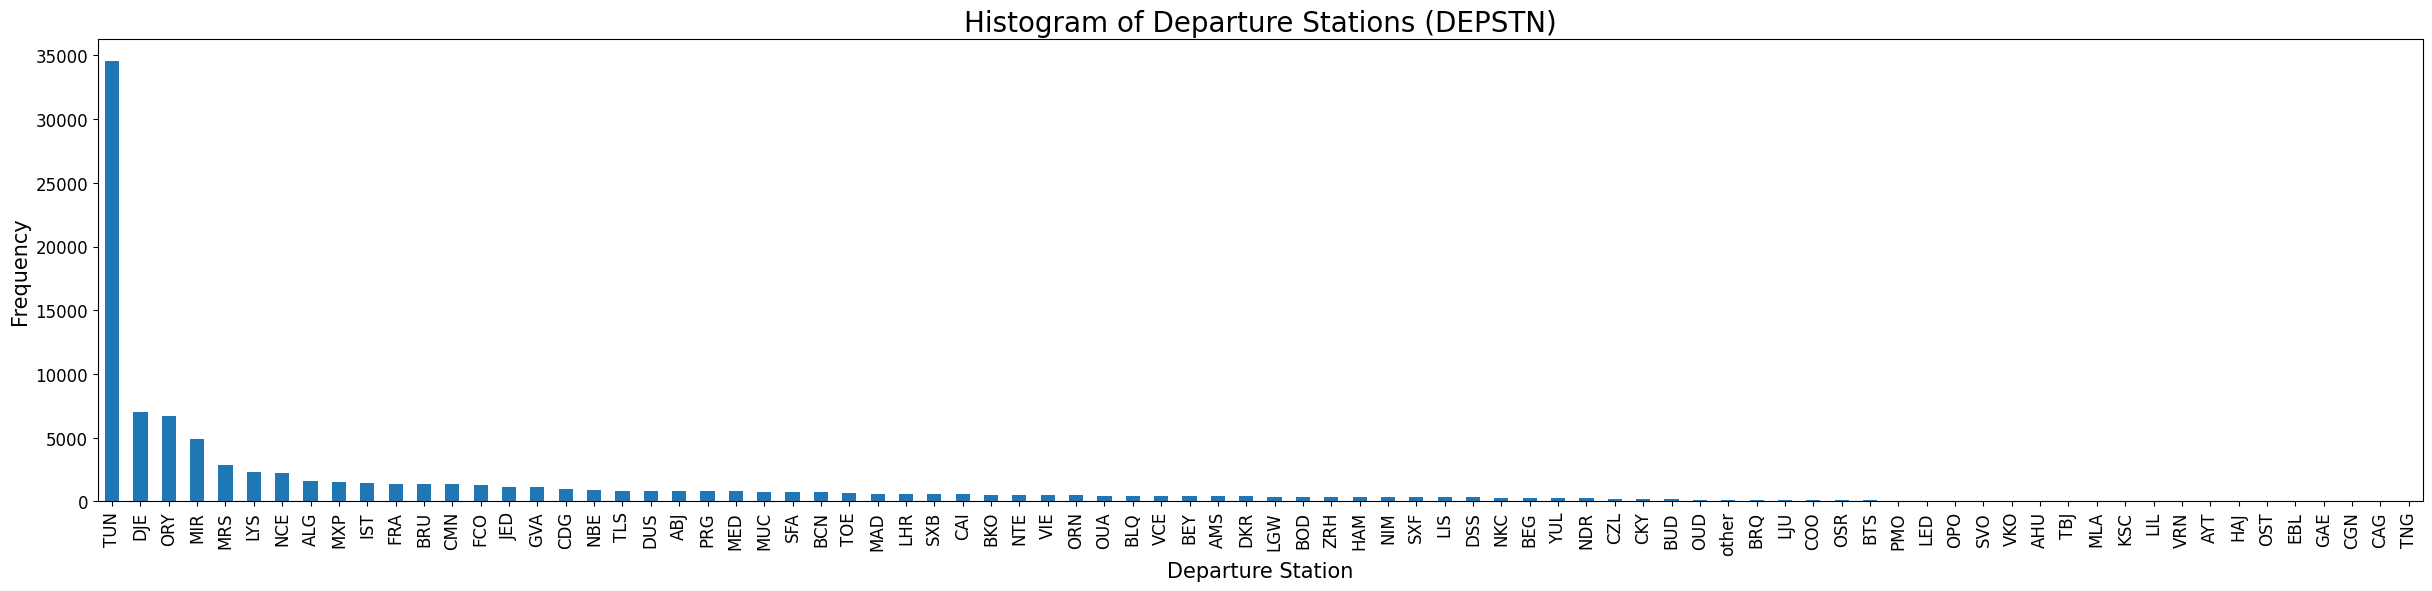

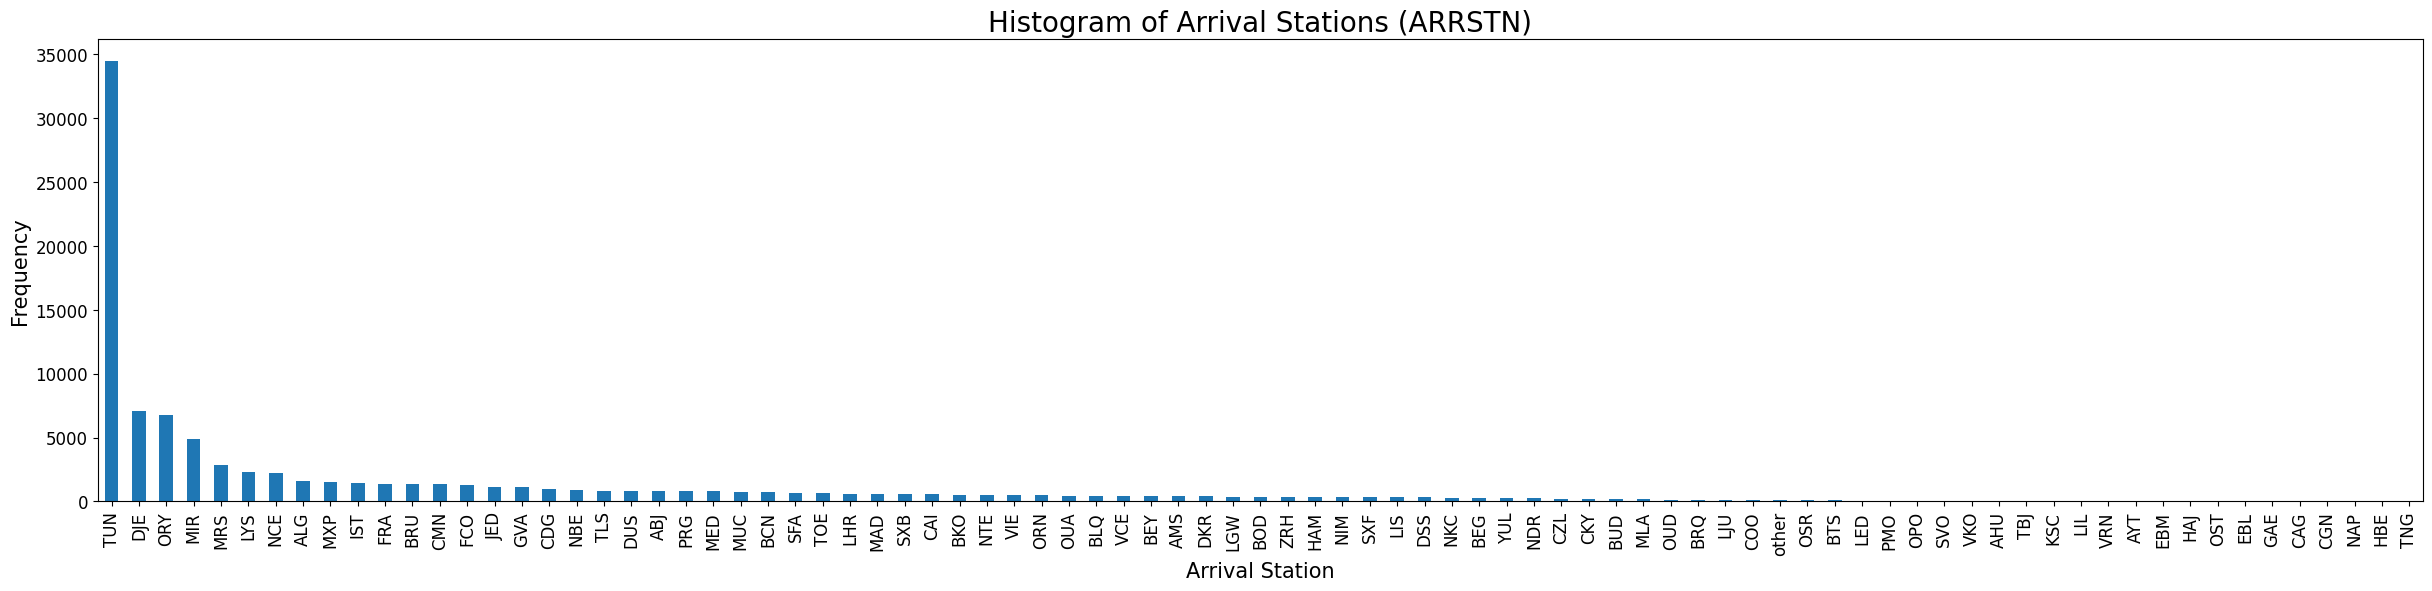

In [22]:
# Analysis of distribution of data frame after creating category 'other'
# Plot histogram for DEPSTN
plt.figure(figsize=(30, 6))
df_updated['depstn'].value_counts().plot(kind='bar')
plt.title('Histogram of Departure Stations (DEPSTN)', fontsize=20)
plt.xlabel('Departure Station', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot histogram for ARRSTN
plt.figure(figsize=(30, 6))
df_updated['arrstn'].value_counts().plot(kind='bar')
plt.title('Histogram of Arrival Stations (ARRSTN)', fontsize=20)
plt.xlabel('Arrival Station', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Analysis of Delay time by Departure and Arrival Station

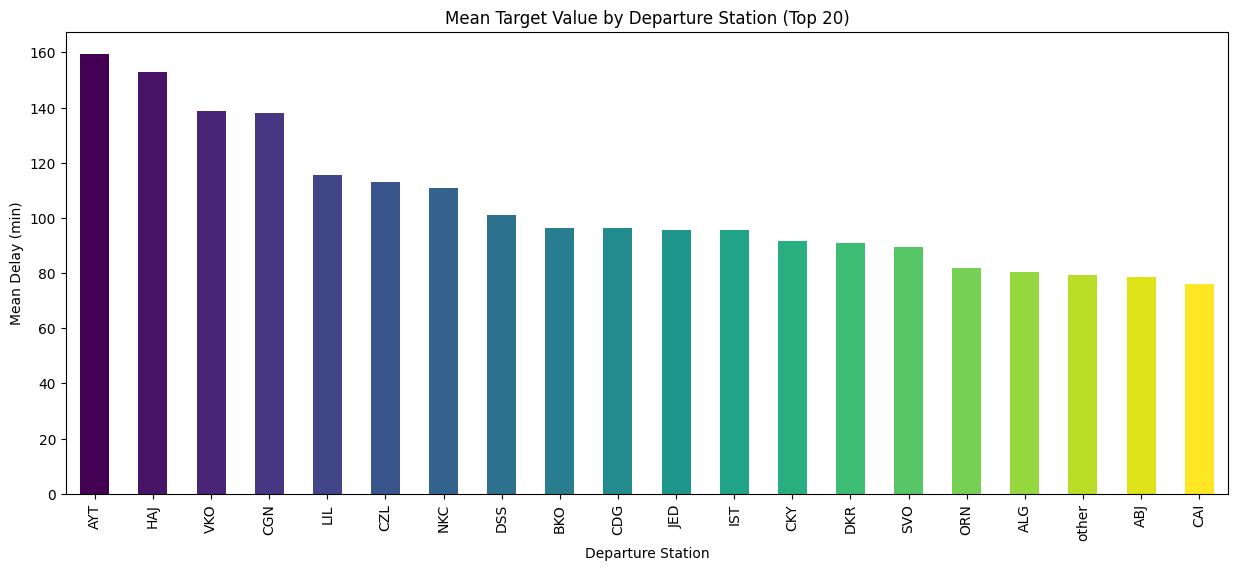

In [23]:
# Calculate the mean of the target variable for each departure station and sort by mean value
depstn_target_mean_top20 = df_updated.groupby('depstn')['target'].mean().sort_values(ascending=False).head(20)

# Plot the bar chart with wider x-axis and gradient colors
plt.figure(figsize=(15, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(depstn_target_mean_top20)))
depstn_target_mean_top20.plot(kind='bar', color=colors)
plt.title('Mean Target Value by Departure Station (Top 20)')
plt.xlabel('Departure Station')
plt.ylabel('Mean Delay (min)')
plt.xticks(rotation=90)
plt.show()

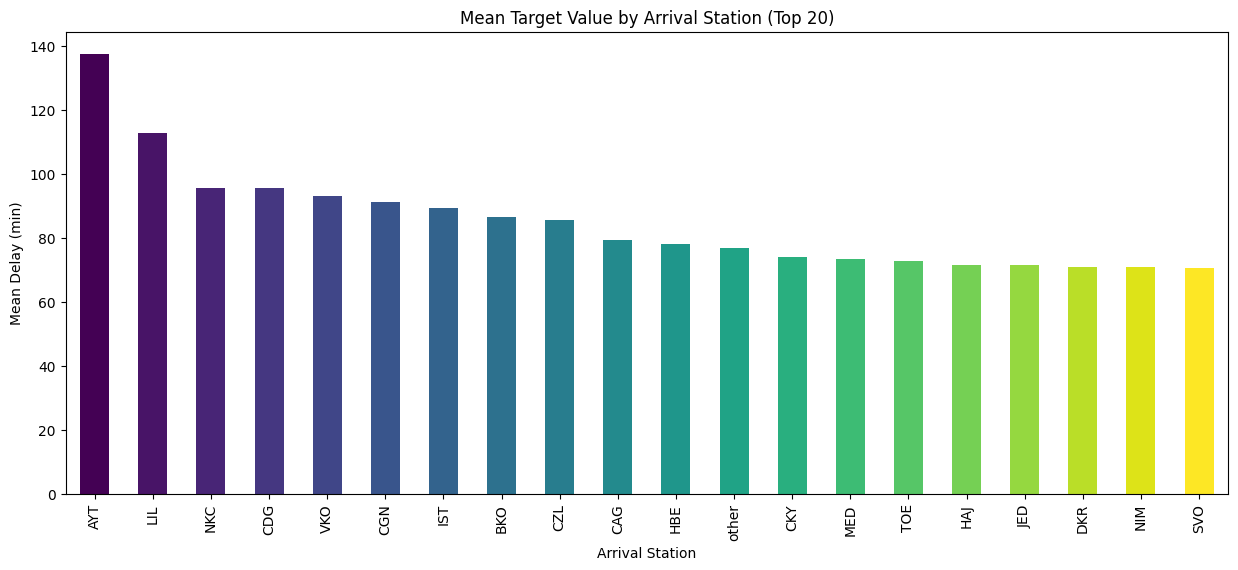

In [24]:
# Calculate the mean of the target variable for each departure station and sort by mean value
arrstn_target_mean_top20 = df_updated.groupby('arrstn')['target'].mean().sort_values(ascending=False).head(20)

# Plot the bar chart with wider x-axis and gradient colors
plt.figure(figsize=(15, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(arrstn_target_mean_top20)))
arrstn_target_mean_top20.plot(kind='bar', color=colors)
plt.title('Mean Target Value by Arrival Station (Top 20)')
plt.xlabel('Arrival Station')
plt.ylabel('Mean Delay (min)')
plt.xticks(rotation=90)
plt.show()

### Make new category based on airport size

In [25]:
depstn_freq = df['depstn'].value_counts()

# Create a new column 'depstn_size' based on the frequency count of 'depstn'
df['depstn_size'] = df['depstn'].apply(lambda x: 'very large' if depstn_freq[x] > 5000 else 
                                       ('large' if depstn_freq[x] >= 2000 else 
                                        ('medium' if depstn_freq[x] >= 1000 else 'small')))
                                    

In [26]:
arrstn_freq = df['arrstn'].value_counts()

# Create a new column 'arrstn_size' based on the frequency count of 'arrstn'
df['arrstn_size'] = df['arrstn'].apply(lambda x: 'very large' if arrstn_freq[x] > 5000 else 
                                       ('large' if arrstn_freq[x] >= 2000 else 
                                        ('medium' if arrstn_freq[x] >= 1000 else 'small')))

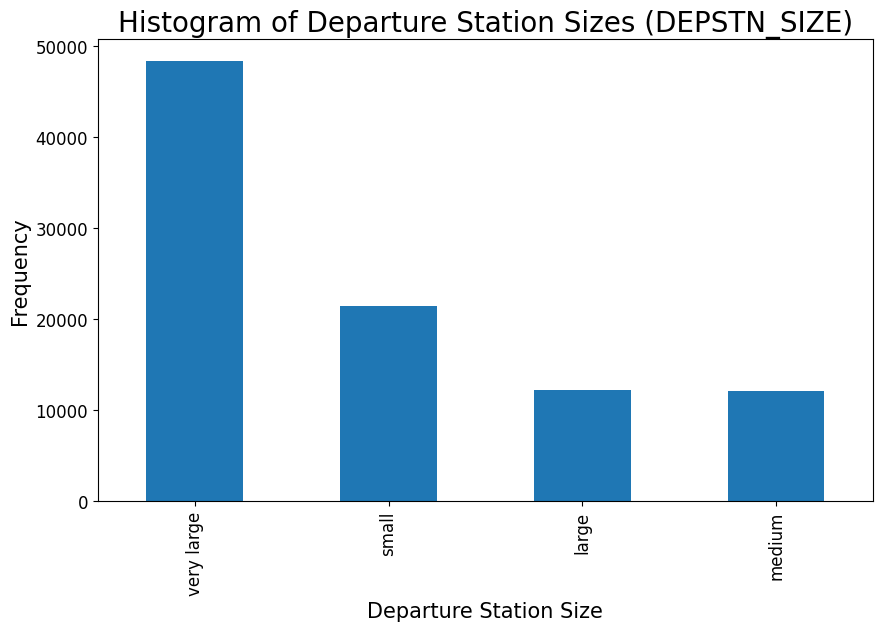

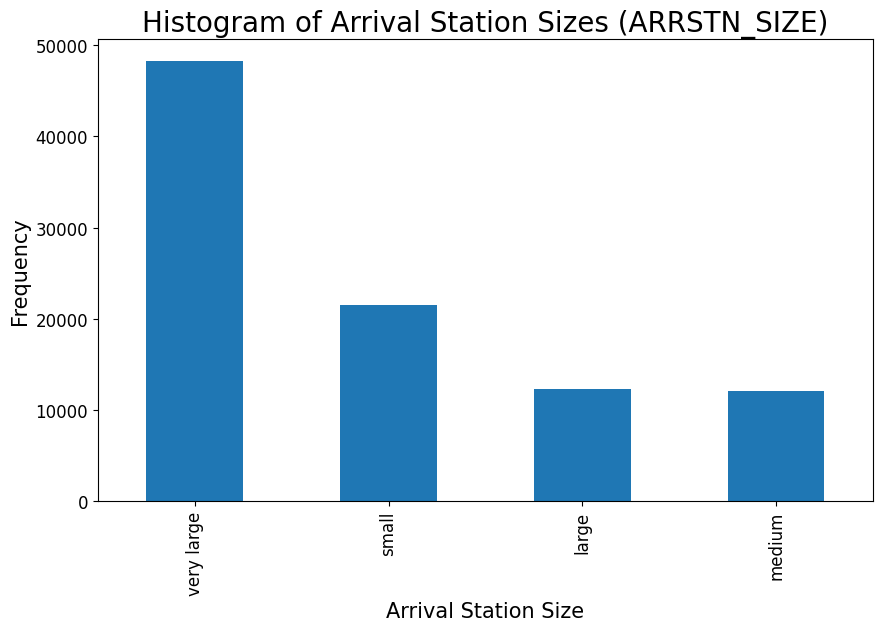

In [27]:
# Plot histogram for DEPSTN_SIZE
plt.figure(figsize=(10, 6))
df['depstn_size'].value_counts().plot(kind='bar')
plt.title('Histogram of Departure Station Sizes (DEPSTN_SIZE)', fontsize=20)
plt.xlabel('Departure Station Size', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot histogram for ARRSTN_SIZE
plt.figure(figsize=(10, 6))
df['arrstn_size'].value_counts().plot(kind='bar')
plt.title('Histogram of Arrival Station Sizes (ARRSTN_SIZE)', fontsize=20)
plt.xlabel('Arrival Station Size', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

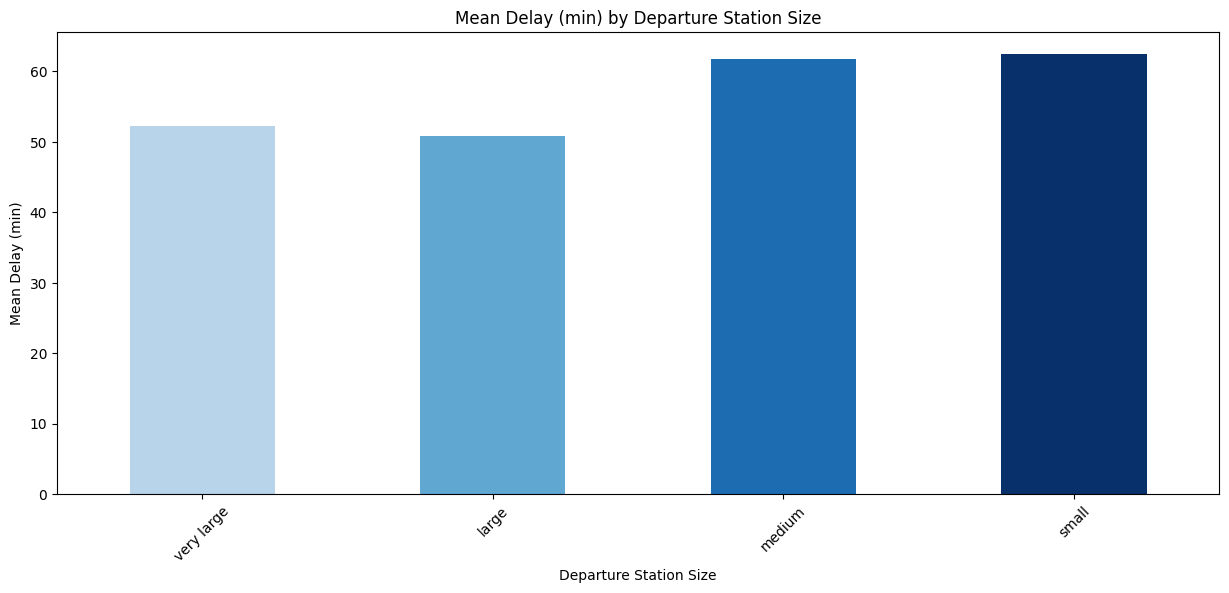

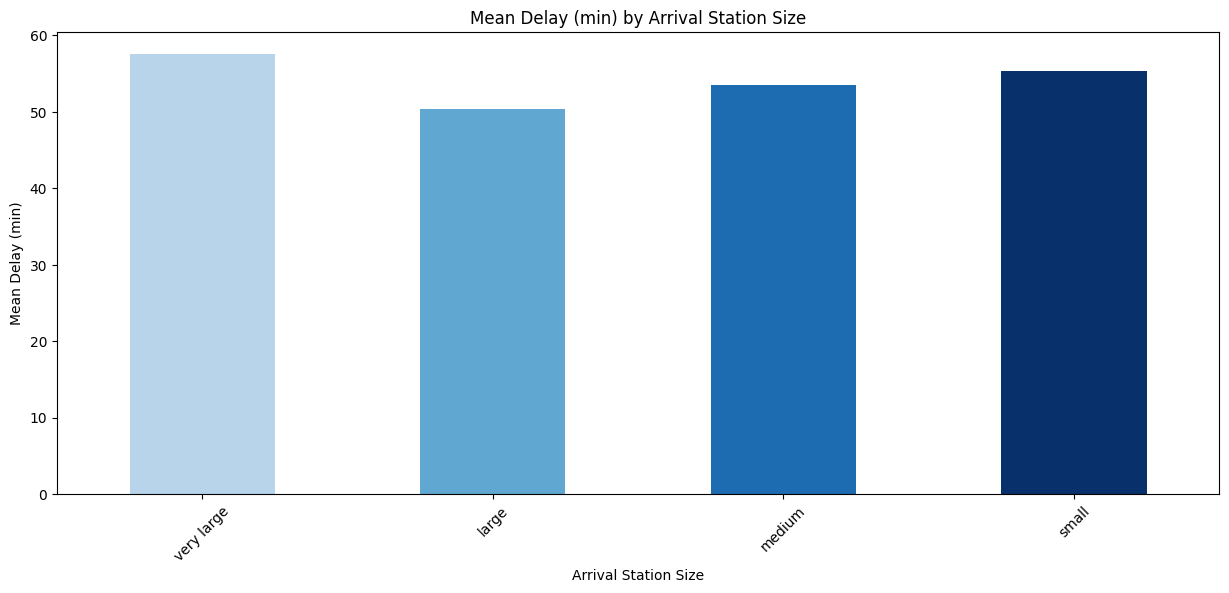

In [29]:
# Calculate the mean delay by departure station size
mean_delay_by_depstn_size = df.groupby('depstn_size')['target'].mean()

# Define the custom order
custom_order = ['very large', 'large', 'medium', 'small']

# Sort mean_delay_by_depstn_size
mean_delay_by_depstn_size = mean_delay_by_depstn_size.reindex(custom_order)

# Plot the bar chart for depstn_size
plt.figure(figsize=(15, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(mean_delay_by_depstn_size)))  # Adjusted color range
mean_delay_by_depstn_size.plot(kind='bar', color=colors)
plt.title('Mean Delay (min) by Departure Station Size')
plt.xlabel('Departure Station Size')
plt.ylabel('Mean Delay (min)')
plt.xticks(rotation=45)
plt.show()

# Calculate the mean delay by arrival station size
mean_delay_by_arrstn_size = df.groupby('arrstn_size')['target'].mean()

# Sort mean_delay_by_arrstn_size
mean_delay_by_arrstn_size = mean_delay_by_arrstn_size.reindex(custom_order)

# Plot the bar chart for arrstn_size
plt.figure(figsize=(15, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(mean_delay_by_arrstn_size)))  # Adjusted color range
mean_delay_by_arrstn_size.plot(kind='bar', color=colors)
plt.title('Mean Delay (min) by Arrival Station Size')
plt.xlabel('Arrival Station Size')
plt.ylabel('Mean Delay (min)')
plt.xticks(rotation=45)
plt.show()